# Insert necessary Python libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# First add Csv DataFrame for accurate version

In [6]:
dataframe = pd.read_csv("zomato.csv")
pd.DataFrame(dataframe.head())

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Before proceeding, let’s convert the data type of the “rate” column to float and remove the denominator.

In [9]:
def handleRate(value):
    try:
        value = str(value).split('/')[0]  
        return float(value)  
    except (ValueError, IndexError): 
        return float('nan')  


dataframe['rate'] = dataframe['rate'].apply(handleRate)
pd.DataFrame(dataframe.head())




,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# To obtain a summary of the data frame 

In [10]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         41665 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  object 
 13  reviews_list    

# Let’s explore the listed_in (type) column

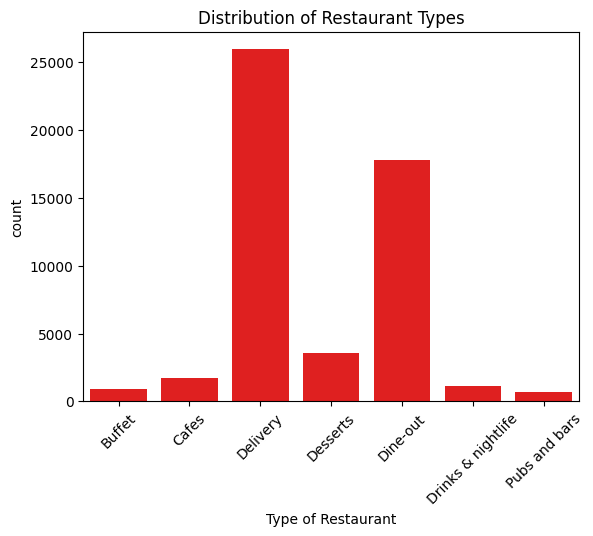

In [14]:

sb.countplot(x='listed_in(type)', data=dataframe,color='red')
plt.xlabel("Type of Restaurant")
plt.xticks(rotation=45)
plt.title("Distribution of Restaurant Types")

plt.show()



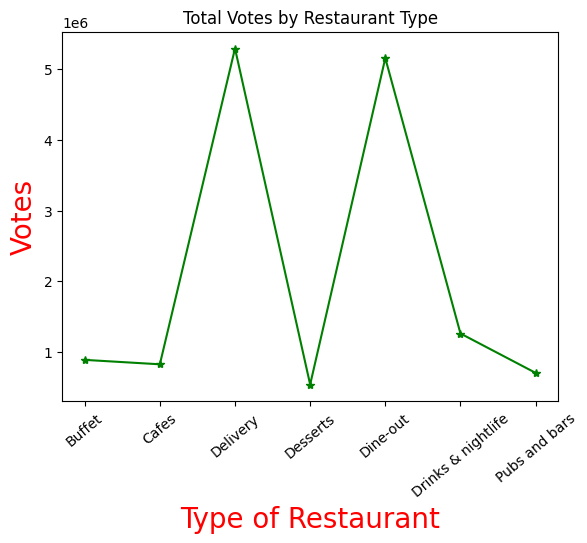

In [18]:


grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})


plt.plot(result.index, result['votes'], c="green", marker="*")
plt.xlabel("Type of Restaurant", color="red", fontsize=20)
plt.ylabel("Votes", color="red", fontsize=20)
plt.xticks(rotation=40)
plt.title("Total Votes by Restaurant Type")

# Display the plot
plt.show()


In [19]:
# Find the maximum votes
max_votes = dataframe['votes'].max()

# Find the restaurant(s) with the maximum votes
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

# Print the result in a more readable way
print("Restaurant(s) with the maximum votes:")
for restaurant in restaurant_with_max_votes:
    print(restaurant)


Restaurant(s) with the maximum votes:
Byg Brewski Brewing Company
Byg Brewski Brewing Company
Byg Brewski Brewing Company


<Axes: xlabel='online_order', ylabel='count'>

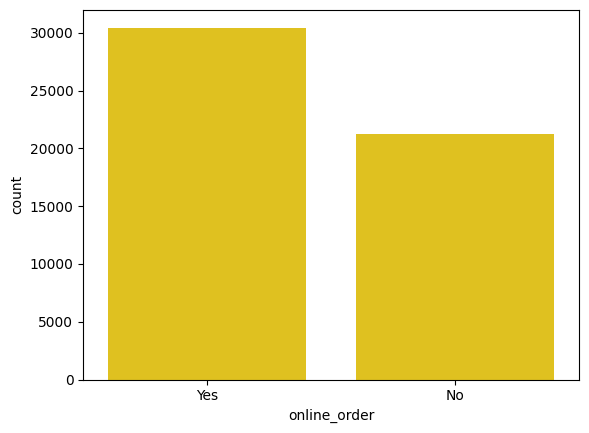

In [24]:
sb.countplot(x=dataframe['online_order'],color='gold')


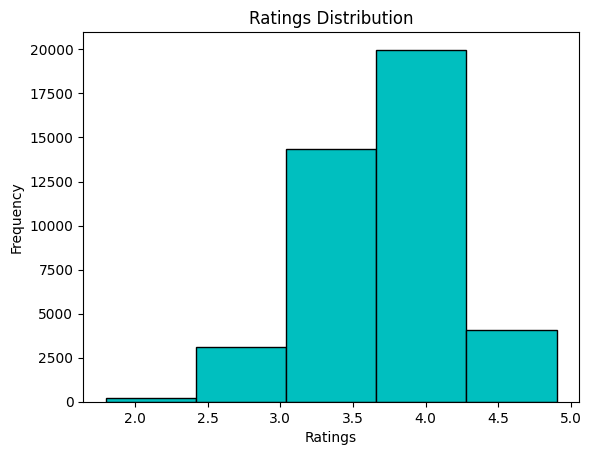

In [30]:
import matplotlib.pyplot as plt


dataframe['rate'] = pd.to_numeric(dataframe['rate'], errors='coerce')
plt.hist(dataframe['rate'].dropna(), bins=5, color= 'c' , edgecolor='black')

plt.title("Ratings Distribution")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()


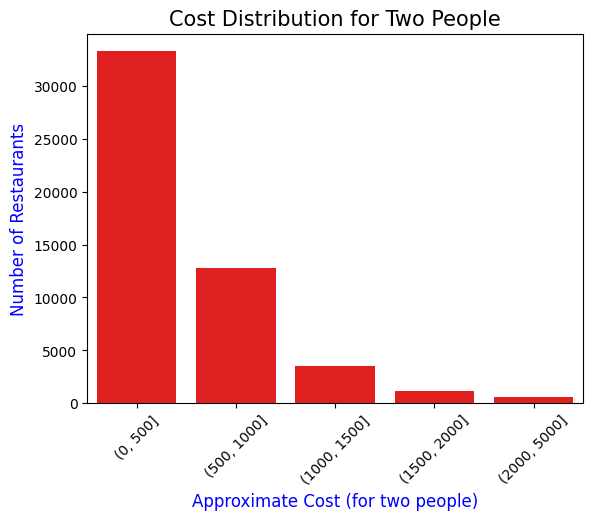

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].replace(',', '', regex=True)
dataframe['approx_cost(for two people)'] = pd.to_numeric(dataframe['approx_cost(for two people)'], errors='coerce')


couple_data = dataframe['approx_cost(for two people)'].dropna()


bins = [0, 500, 1000, 1500, 2000, 5000]  
couple_data_binned = pd.cut(couple_data, bins=bins)

sb.countplot(x=couple_data_binned, color = 'red')
plt.xlabel("Approximate Cost (for two people)", color='blue', fontsize=12)
plt.ylabel("Number of Restaurants", color='blue', fontsize=12)
plt.title("Cost Distribution for Two People", fontsize=15)
plt.xticks(rotation=45)

# Display the plot
plt.show()


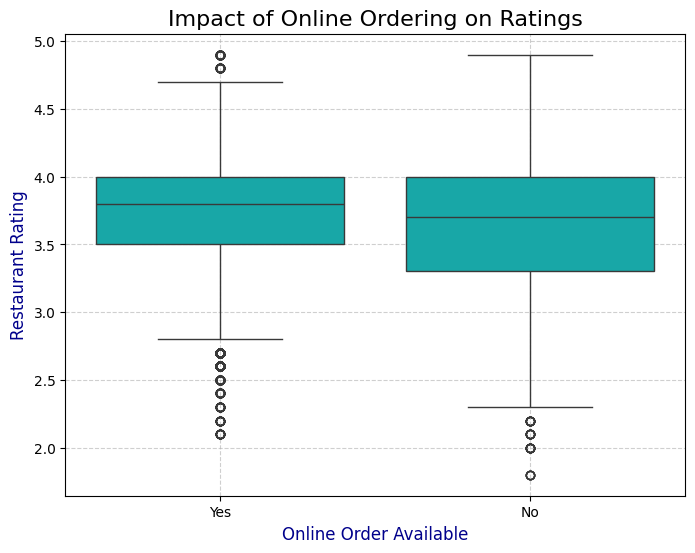

In [36]:

dataframe['rate'] = pd.to_numeric(dataframe['rate'], errors='coerce')
cleaned_data = dataframe.dropna(subset=['rate'])
plt.figure(figsize=(8,6)) 
sb.boxplot(x='online_order', y='rate', data=cleaned_data, color = 'c')


plt.xlabel("Online Order Available", fontsize=12, color='darkblue')
plt.ylabel("Restaurant Rating", fontsize=12, color='darkblue')
plt.title("Impact of Online Ordering on Ratings", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()


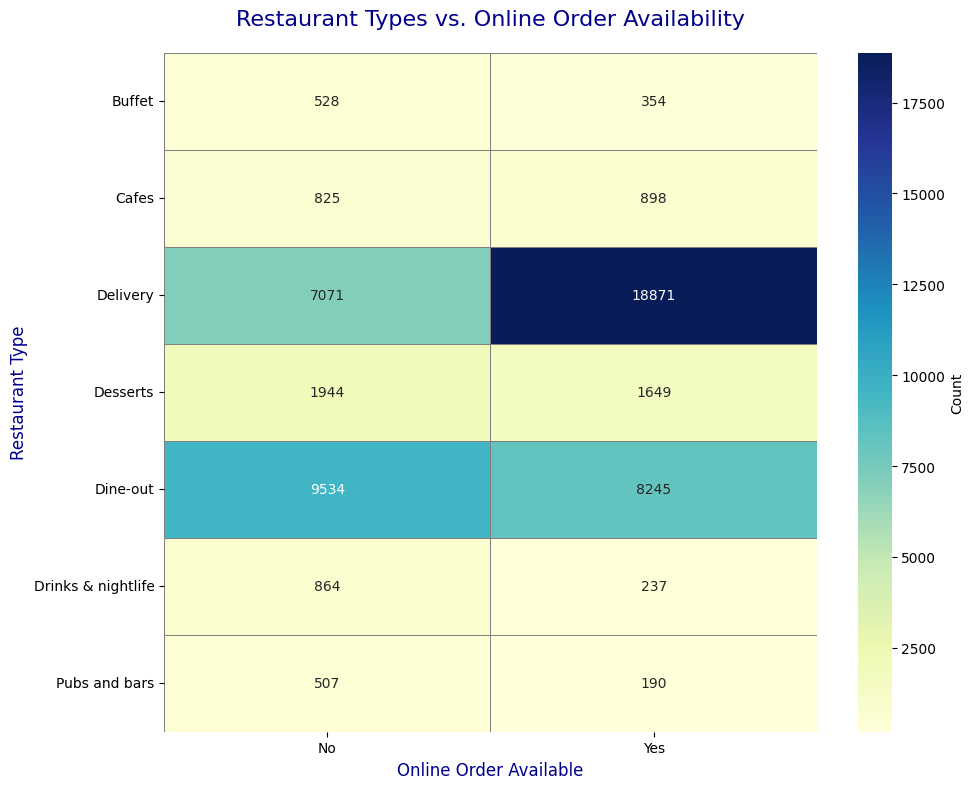

In [37]:

pivot_table = dataframe.pivot_table(
    index='listed_in(type)', 
    columns='online_order', 
    aggfunc='size', 
    fill_value=0
)

# Set the figure size for better readability
plt.figure(figsize=(10, 8))

sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Count'})


plt.title("Restaurant Types vs. Online Order Availability", fontsize=16, color='darkblue', pad=20)
plt.xlabel("Online Order Available", fontsize=12, color='darkblue')
plt.ylabel("Restaurant Type", fontsize=12, color='darkblue')

plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()  
plt.show()
